In [29]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact_manual
from IPython.display import display
from ipywidgets import Layout

notebook_path = os.path.abspath("")
os.chdir(notebook_path)

pd.options.mode.chained_assignment = None  # default='warn'

from nba_shot_viz import *

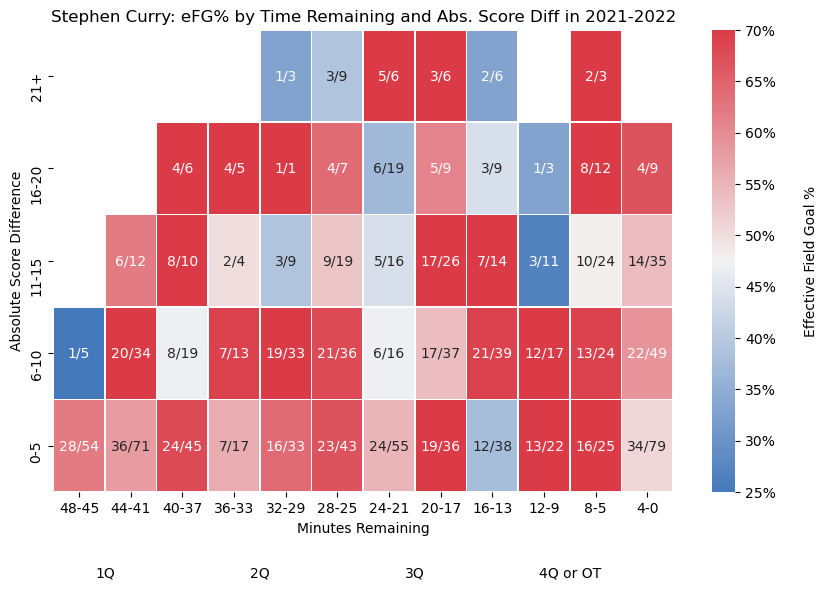

In [2]:
efg_scorediff_heatmap(season = 2022, player_name = "Stephen Curry")

In [5]:
df = ingest_data(2023)
df = clean_pbp_data(df)
df = create_buckets(df)

In [8]:
def get_season_avg(df):
    ''' This function returns the season average for the league for every bucket combo''' 
    #Aggregate the data
    agg_df = aggregate_data(df)
    agg_df_pivot = pivot_efg(agg_df)
    return agg_df_pivot

In [9]:
get_season_avg(df)

RAW_MINUTES_REMAINING_BUCKETS,48-45,44-41,40-37,36-33,32-29,28-25,24-21,20-17,16-13,12-9,8-5,4-0
ABS_SCORE_DIFF_BUCKETS,,,,,,,,,,,,
21+,NaN,0.25,0.56,0.54,0.54,0.55,0.56,0.56,0.56,0.53,0.56,0.54
16-20,NaN,0.64,0.56,0.49,0.55,0.57,0.55,0.56,0.55,0.54,0.54,0.54
11-15,0.55,0.55,0.55,0.52,0.56,0.55,0.53,0.58,0.55,0.51,0.54,0.53
6-10,0.56,0.57,0.57,0.53,0.54,0.55,0.55,0.57,0.55,0.52,0.53,0.52
0-5,0.55,0.56,0.55,0.53,0.54,0.57,0.54,0.56,0.55,0.52,0.55,0.50


In [15]:
def season_dropdown():
    # Create initial season range
    season_range = range(2003, 2023)
    # Add the full season name as strings to the season range
    season_range = [str(season) + '-' + str(season+1) for season in season_range]
    
    # Create the description widget for the season dropdown
    season_description = widgets.Label("Choose season:")
    
    # Create the season dropdown widget
    season_dropdown_widget = widgets.Dropdown(
        options=season_range,
        value='2022-2023',
        disabled=False
    )
    
    # Combine the season description and dropdown widgets vertically using VBox layout
    season_vbox = widgets.VBox([season_description, season_dropdown_widget])
    
    # Create the description widget for the text box
    text_description = widgets.Label("Select Player:")
    
    # Create the text box widget with autocomplete functionality
    text_box_widget = widgets.Text(placeholder="Start typing to select",
                                    layout=widgets.Layout(width='auto'),
                                    disabled=False)
    
    # Combine the text description and text box widgets vertically using VBox layout
    text_vbox = widgets.VBox([text_description, text_box_widget])
    
    # Combine the season and text widgets horizontally using HBox layout
    vbox = widgets.HBox([season_vbox, text_vbox])
    
    return vbox

# Create the dropdown menu
dropdown = season_dropdown()

# Display the dropdown menu
display(dropdown)

In [14]:
# Save the selected season and player as variables
selected_season = dropdown.children[0].children[1].value
selected_player = dropdown.children[1].children[1].value

# Print the selected season and player
print("Selected season:", selected_season)
print("Selected player:", selected_player)

Selected season: 2022-2023
Selected player: Dillon Brooks


In [41]:
def update_heatmap(selected_season, player_name):
    #Truncate the season variable to the first 4 characters
    season = selected_season.split('-')[0]
    efg_scorediff_heatmap(season, team_name = None, player_name = player_name)

dropdown = season_dropdown()
#display(dropdown)

# Reference the widgets
season_dropdown_widget = dropdown.children[0].children[1]
text_box_widget = dropdown.children[1].children[1]

# Set the descriptions
season_dropdown_widget.description = "Season:"
text_box_widget.description = "Player:"

# Set the layout
layout = Layout(width='550px')  # Or any other width you want, e.g. '150px'
season_dropdown_widget.layout = layout
text_box_widget.layout = layout

# Change the button description
interact = interact_manual.options(manual_name = "Show Heatmap")

interact(update_heatmap, selected_season=season_dropdown_widget, player_name=text_box_widget);

#display(interact)

interactive(children=(Dropdown(description='Season:', index=19, layout=Layout(width='550px'), options=('2003-2…

In [13]:
def create_selection_data(selected_season, selected_filter):
    ''' This function will create the data for the dropdown selection'''
    #Remove all characters after and including the dash
    season = selected_season.split('-')[0]
    #Ingest the dataset based on the selected season
    df = ingest_data(season)
    
    #Create the player and team lists
    player_list = df['PLAYER_NAME'].unique().tolist()
    team_list = df['TEAM_NAME'].unique().tolist()

    if selected_filter == 'Player':
        return player_list
    else:
        return team_list